Project is aimed to train a machine to identify if a person is poi or not from the Enron data set.

In [2]:
# import needed packages
import pickle
import matplotlib.pyplot
from sklearn.metrics import precision_score, recall_score

from tools.feature_format import featureFormat, targetFeatureSplit
from final_project.tester import dump_classifier_and_data
import pandas as pd
import numpy as np

In [3]:
with open("final_project/final_project_dataset.pkl", "rb") as data_file:
    enron_df = pd.DataFrame.from_dict(pickle.load(data_file)).transpose()
poi_label = enron_df['poi'].map({True: 1, False: 0}).tolist()
print(poi_label, type(poi_label))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] <class 'list'>


### Remove outliers

In [4]:
outlier_with_max_salary = enron_df['salary'].astype('float32').idxmax()
enron_df.drop([outlier_with_max_salary, 'THE TRAVEL AGENCY IN THE PARK'], inplace=True)

### Selecting Features

In [5]:
all_available_features = ['salary', 
                          'deferral_payments', 
                          'total_payments',
                          'loan_advances', 
                          'bonus', 
                          'restricted_stock_deferred',
                          'deferred_income', 
                          'total_stock_value', 
                          'expenses',
                          'exercised_stock_options', 
                          'other',
                          'long_term_incentive', 
                          'restricted_stock', 
                          'director_fees']

enron_df.replace(to_replace='NaN', value=np.nan, inplace=True)
enron_df['poi'] = enron_df['poi'].astype('int32')
enron_df.head(10)

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>bonus</th>
      <th>deferral_payments</th>
      <th>deferred_income</th>
      <th>director_fees</th>
      <th>email_address</th>
      <th>exercised_stock_options</th>
      <th>expenses</th>
      <th>from_messages</th>
      <th>from_poi_to_this_person</th>
      <th>from_this_person_to_poi</th>
      <th>...</th>
      <th>long_term_incentive</th>
      <th>other</th>
      <th>poi</th>
      <th>restricted_stock</th>
      <th>restricted_stock_deferred</th>
      <th>salary</th>
      <th>shared_receipt_with_poi</th>
      <th>to_messages</th>
      <th>total_payments</th>
      <th>total_stock_value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>ALLEN PHILLIP K</th>
      <td>4175000.0</td>
      <td>2869717.0</td>
      <td>-3081055.0</td>
      <td>NaN</td>
      <td>phillip.allen@enron.com</td>
      <td>1729541.0</td>
      <td>13868.0</td>
      <td>2195.0</td>
      <td>47.0</td>
      <td>65.0</td>
      <td>...</td>
      <td>304805.0</td>
      <td>152.0</td>
      <td>0</td>
      <td>126027.0</td>
      <td>-126027.0</td>
      <td>201955.0</td>
      <td>1407.0</td>
      <td>2902.0</td>
      <td>4484442.0</td>
      <td>1729541.0</td>
    </tr>
    <tr>
      <th>BADUM JAMES P</th>
      <td>NaN</td>
      <td>178980.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>257817.0</td>
      <td>3486.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>182466.0</td>
      <td>257817.0</td>
    </tr>
    <tr>
      <th>BANNANTINE JAMES M</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>-5104.0</td>
      <td>NaN</td>
      <td>james.bannantine@enron.com</td>
      <td>4046157.0</td>
      <td>56301.0</td>
      <td>29.0</td>
      <td>39.0</td>
      <td>0.0</td>
      <td>...</td>
      <td>NaN</td>
      <td>864523.0</td>
      <td>0</td>
      <td>1757552.0</td>
      <td>-560222.0</td>
      <td>477.0</td>
      <td>465.0</td>
      <td>566.0</td>
      <td>916197.0</td>
      <td>5243487.0</td>
    </tr>
    <tr>
      <th>BAXTER JOHN C</th>
      <td>1200000.0</td>
      <td>1295738.0</td>
      <td>-1386055.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6680544.0</td>
      <td>11200.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>...</td>
      <td>1586055.0</td>
      <td>2660303.0</td>
      <td>0</td>
      <td>3942714.0</td>
      <td>NaN</td>
      <td>267102.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>5634343.0</td>
      <td>10623258.0</td>
    </tr>
    <tr>
      <th>BAY FRANKLIN R</th>
      <td>400000.0</td>
      <td>260455.0</td>
      <td>-201641.0</td>
      <td>NaN</td>
      <td>frank.bay@enron.com</td>
      <td>NaN</td>
      <td>129142.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>...</td>
      <td>NaN</td>
      <td>69.0</td>
      <td>0</td>
      <td>145796.0</td>
      <td>-82782.0</td>
      <td>239671.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>827696.0</td>
      <td>63014.0</td>
    </tr>
    <tr>
      <th>BAZELIDES PHILIP J</th>
      <td>NaN</td>
      <td>684694.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1599641.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>...</td>
      <td>93750.0</td>
      <td>874.0</td>
      <td>0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>80818.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>860136.0</td>
      <td>1599641.0</td>
    </tr>
    <tr>
      <th>BECK SALLY W</th>
      <td>700000.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>sally.beck@enron.com</td>
      <td>NaN</td>
      <td>37172.0</td>
    

In [6]:
enron_df.describe()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>bonus</th>
      <th>deferral_payments</th>
      <th>deferred_income</th>
      <th>director_fees</th>
      <th>exercised_stock_options</th>
      <th>expenses</th>
      <th>from_messages</th>
      <th>from_poi_to_this_person</th>
      <th>from_this_person_to_poi</th>
      <th>loan_advances</th>
      <th>long_term_incentive</th>
      <th>other</th>
      <th>poi</th>
      <th>restricted_stock</th>
      <th>restricted_stock_deferred</th>
      <th>salary</th>
      <th>shared_receipt_with_poi</th>
      <th>to_messages</th>
      <th>total_payments</th>
      <th>total_stock_value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>8.100000e+01</td>
      <td>3.800000e+01</td>
      <td>4.800000e+01</td>
      <td>16.000000</td>
      <td>1.010000e+02</td>
      <td>94.000000</td>
      <td>86.000000</td>
      <td>86.000000</td>
      <td>86.000000</td>
      <td>3.000000e+00</td>
      <td>6.500000e+01</td>
      <td>9.100000e+01</td>
      <td>144.000000</td>
      <td>1.090000e+02</td>
      <td>1.700000e+01</td>
      <td>9.400000e+01</td>
      <td>86.000000</td>
      <td>86.000000</td>
      <td>1.230000e+02</td>
      <td>1.250000e+02</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>1.201773e+06</td>
      <td>8.416025e+05</td>
      <td>-5.810498e+05</td>
      <td>89822.875000</td>
      <td>2.959559e+06</td>
      <td>54192.010638</td>
      <td>608.790698</td>
      <td>64.895349</td>
      <td>41.232558</td>
      <td>2.797500e+07</td>
      <td>7.464912e+05</td>
      <td>4.664105e+05</td>
      <td>0.125000</td>
      <td>1.147424e+06</td>
      <td>6.218928e+05</td>
      <td>2.840875e+05</td>
      <td>1176.465116</td>
      <td>2073.860465</td>
      <td>2.641806e+06</td>
      <td>3.352073e+06</td>
    </tr>
    <tr>
      <th>std</th>
      <td>1.441679e+06</td>
      <td>1.289323e+06</td>
      <td>9.420764e+05</td>
      <td>41112.700735</td>
      <td>5.499450e+06</td>
      <td>46108.377454</td>
      <td>1841.033949</td>
      <td>86.979244</td>
      <td>100.073111</td>
      <td>4.638256e+07</td>
      <td>8.629174e+05</td>
      <td>1.397376e+06</td>
      <td>0.331873</td>
      <td>2.249770e+06</td>
      <td>3.845528e+06</td>
      <td>1.771311e+05</td>
      <td>1178.317641</td>
      <td>2582.700981</td>
      <td>9.524694e+06</td>
      <td>6.532883e+06</td>
    </tr>
    <tr>
      <th>min</th>
      <td>7.000000e+04</td>
      <td>-1.025000e+05</td>
      <td>-3.504386e+06</td>
      <td>3285.000000</td>
      <td>3.285000e+03</td>
      <td>148.000000</td>
      <td>12.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>4.000000e+05</td>
      <td>6.922300e+04</td>
      <td>2.000000e+00</td>
      <td>0.000000</td>
      <td>-2.604490e+06</td>
      <td>-1.787380e+06</td>
      <td>4.770000e+02</td>
      <td>2.000000</td>
      <td>57.000000</td>
      <td>1.480000e+02</td>
      <td>-4.409300e+04</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>4.250000e+05</td>
      <td>7.964450e+04</td>
      <td>-6.112092e+05</td>
      <td>83674.500000</td>
      <td>5.067650e+05</td>
      <td>22479.000000</td>
      <td>22.750000</td>
      <td>10.000000</td>
      <td>1.000000</td>
      <td>1.200000e+06</td>
      <td>2.750000e+05</td>
      <td>1.203000e+03</td>
      <td>0.000000</td>
      <td>2.520550e+05</td>
      <td>-3.298250e+05</td>
      <td>2.118020e+05</td>
      <td>249.750000</td>
      <td>541.250000</td>
      <td>3.969340e+05</td>
      <td>4.941360e+05</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>7.500000e+05</td>
      <td>2.210635e+05</td>
      <td>-1.519270e+05</td>
      <td>106164.500000</td>
      <td>1.297049e+06</td>
      <td>46547.500000</td>
      <td>41.000000</td>
      <td>35.000000</td>
      <td>8.000000</td>
      <td>2.000000e+06</td>
      <td>4.221580e+05</td>
      <td>5.158

In [7]:
enron_df['poi'].sum()

18

In [8]:
import sklearn

# replace NaN values with 0
enron_df['from_poi_to_this_person'].fillna(0)
enron_df['from_messages'].fillna(0)


poi_ratio = (enron_df['from_poi_to_this_person'] + 
             enron_df['from_this_person_to_poi']) / (enron_df['from_messages'] + 
                                                     enron_df['to_messages'])
fraction_to_poi = (enron_df['from_this_person_to_poi']) / (enron_df['from_messages'])
fraction_from_poi = (enron_df['from_poi_to_this_person']) / (enron_df['to_messages'])
scale = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 100), copy=True)

enron_df['poi_ratio'] = poi_ratio * 100
enron_df['fraction_to_poi'] = fraction_to_poi * 100
enron_df['fraction_from_poi'] = fraction_from_poi * 100

# rescale salary, fill NaN values with averages
enron_df['salary'] = enron_df['salary'].fillna(np.average(enron_df['salary'].dropna()))
salary_scaled = scale.fit_transform(enron_df['salary'])
enron_df['salary'] = salary_scaled 
enron_df.describe()

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>bonus</th>
      <th>deferral_payments</th>
      <th>deferred_income</th>
      <th>director_fees</th>
      <th>exercised_stock_options</th>
      <th>expenses</th>
      <th>from_messages</th>
      <th>from_poi_to_this_person</th>
      <th>from_this_person_to_poi</th>
      <th>loan_advances</th>
      <th>...</th>
      <th>restricted_stock</th>
      <th>restricted_stock_deferred</th>
      <th>salary</th>
      <th>shared_receipt_with_poi</th>
      <th>to_messages</th>
      <th>total_payments</th>
      <th>total_stock_value</th>
      <th>poi_ratio</th>
      <th>fraction_to_poi</th>
      <th>fraction_from_poi</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>8.100000e+01</td>
      <td>3.800000e+01</td>
      <td>4.800000e+01</td>
      <td>16.000000</td>
      <td>1.010000e+02</td>
      <td>94.000000</td>
      <td>86.000000</td>
      <td>86.000000</td>
      <td>86.000000</td>
      <td>3.000000e+00</td>
      <td>...</td>
      <td>1.090000e+02</td>
      <td>1.700000e+01</td>
      <td>144.000000</td>
      <td>86.000000</td>
      <td>86.000000</td>
      <td>1.230000e+02</td>
      <td>1.250000e+02</td>
      <td>86.000000</td>
      <td>86.000000</td>
      <td>86.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>1.201773e+06</td>
      <td>8.416025e+05</td>
      <td>-5.810498e+05</td>
      <td>89822.875000</td>
      <td>2.959559e+06</td>
      <td>54192.010638</td>
      <td>608.790698</td>
      <td>64.895349</td>
      <td>41.232558</td>
      <td>2.797500e+07</td>
      <td>...</td>
      <td>1.147424e+06</td>
      <td>6.218928e+05</td>
      <td>25.532535</td>
      <td>1176.465116</td>
      <td>2073.860465</td>
      <td>2.641806e+06</td>
      <td>3.352073e+06</td>
      <td>4.770893</td>
      <td>18.405548</td>
      <td>3.796298</td>
    </tr>
    <tr>
      <th>std</th>
      <td>1.441679e+06</td>
      <td>1.289323e+06</td>
      <td>9.420764e+05</td>
      <td>41112.700735</td>
      <td>5.499450e+06</td>
      <td>46108.377454</td>
      <td>1841.033949</td>
      <td>86.979244</td>
      <td>100.073111</td>
      <td>4.638256e+07</td>
      <td>...</td>
      <td>2.249770e+06</td>
      <td>3.845528e+06</td>
      <td>12.859967</td>
      <td>1178.317641</td>
      <td>2582.700981</td>
      <td>9.524694e+06</td>
      <td>6.532883e+06</td>
      <td>4.645513</td>
      <td>21.061035</td>
      <td>4.054439</td>
    </tr>
    <tr>
      <th>min</th>
      <td>7.000000e+04</td>
      <td>-1.025000e+05</td>
      <td>-3.504386e+06</td>
      <td>3285.000000</td>
      <td>3.285000e+03</td>
      <td>148.000000</td>
      <td>12.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>4.000000e+05</td>
      <td>...</td>
      <td>-2.604490e+06</td>
      <td>-1.787380e+06</td>
      <td>0.000000</td>
      <td>2.000000</td>
      <td>57.000000</td>
      <td>1.480000e+02</td>
      <td>-4.409300e+04</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>4.250000e+05</td>
      <td>7.964450e+04</td>
      <td>-6.112092e+05</td>
      <td>83674.500000</td>
      <td>5.067650e+05</td>
      <td>22479.000000</td>
      <td>22.750000</td>
      <td>10.000000</td>
      <td>1.000000</td>
      <td>1.200000e+06</td>
      <td>...</td>
      <td>2.520550e+05</td>
      <td>-3.298250e+05</td>
      <td>21.530054</td>
      <td>249.750000</td>
      <td>541.250000</td>
      <td>3.969340e+05</td>
      <td>4.941360e+05</td>
      <td>1.304333</td>
      <td>1.242096</td>
      <td>0.919988</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>7.500000e+05</td>
      <td>2.210635e+05</td>
      <td>-1.519270e+05</td>
      <td>106164.500000</td>
      <td>1.297049e+06</td>
      <td>46547.500000</td>
      <td>41.000000</td>
      <td>35.000000</td>
      <td>8.000000<

In [9]:
df = enron_df.dropna(axis=0, subset=['fraction_from_poi'])

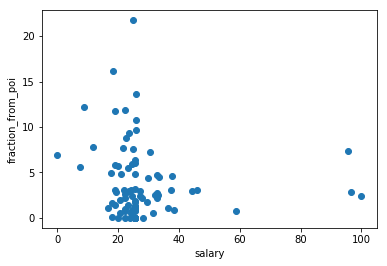

In [10]:
import matplotlib.pyplot
# plt = matplotlib.pyplot.plot(, y=df['fraction_from_poi'].tolist())
x = df['salary'].tolist()
y = df['fraction_from_poi'].tolist()
matplotlib.pyplot.scatter(x, y)
matplotlib.pyplot.xlabel('salary')
matplotlib.pyplot.ylabel('fraction_from_poi')
matplotlib.pyplot.show()

In [11]:
features = (enron_df.drop(['poi', 'email_address'], axis=1)).fillna(0).copy(deep=True).as_matrix()
labels = poi_label[:-2]
print(len(labels), len(features))
shuffle = sklearn.cross_validation.StratifiedShuffleSplit(labels, 4, test_size=0.3, random_state=0)

144 144


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10)
scores = sklearn.cross_validation.cross_val_score(rf_clf, features, labels)

print(scores)

[ 0.85714286  0.875       0.89361702]


### Tuning random forest

In [16]:
from sklearn import model_selection

cv = sklearn.model_selection.StratifiedShuffleSplit(10)


def scoring(estimator, features_test, labels_test):
    labels_pred = estimator.predict(features_test)
    p = sklearn.metrics.precision_score(labels_test, labels_pred, average='micro')
    r = sklearn.metrics.recall_score(labels_test, labels_pred, average='micro')
    if p > 0.3 and r > 0.3:
        return sklearn.metrics.f1_score(labels_test, labels_pred, average='macro')
    return 0

                                     
parameters = {'max_depth': [2,3,4,5,6],'min_samples_split':[2,3,4,5], 'n_estimators':[10,20,50], 'min_samples_leaf':[1,2,3,4], 'criterion':('gini', 'entropy')}
rf_clf = RandomForestClassifier()
rfclf = model_selection.GridSearchCV(rf_clf, parameters, scoring = scoring, cv = cv)
rfclf.fit(features, labels)

print(rfclf.best_estimator_)
print(rfclf.best_score_)

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: Unde

/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.697344322344


/home/likewise-open/LVIVSOFT/kyermolenko/anaconda3/envs/conda_venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
list_cols = list(enron_df.columns.values)
list_cols.remove('poi')
list_cols.insert(0, 'poi')
data = enron_df[list_cols].fillna(0).to_dict(orient='records')
enron_data_sub = {}
counter = 0
for item in data:
    enron_data_sub[counter] = item
    counter += 1
dump_classifier_and_data(rfclf.best_estimator_, enron_data_sub, list_cols)